### Элементы теории вероятностей

In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import math
import itertools
%matplotlib inline

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
number = int(input("Сколько раз будем крутить рулетку? "))

Сколько раз будем крутить рулетку? 5


In [3]:
x = list()
for iteration in range(number):
    input('Ваши ставки: ')
    x.append(np.random.randint(0, 36))
    print('Выпало число', x[-1])
    print()
    
print('Сегодня выпадали следующие числа:', x)

Ваши ставки: 23
Выпало число 35

Ваши ставки: 15
Выпало число 27

Ваши ставки: 17
Выпало число 18

Ваши ставки: 9
Выпало число 4

Ваши ставки: 21
Выпало число 35

Сегодня выпадали следующие числа: [35, 27, 18, 4, 35]


2. 1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Задача: Найти вероятность выпадения 2 или 5 очков при подбрасывании игральной кости, на гранях которой имеются соответственно 1,2,3,4,5 и 6 очков. 

In [4]:
prob_sum = 1 / 6 + 1 / 6
prob_sum

0.3333333333333333

In [5]:
n_model = 10000
success = 0
for i in range(n_model):
    number = np.random.randint(0, 6)
    if number == 2 or number == 5:
        success += 1
        
prob_sum_in_modeling = success / n_model
prob_sum_in_modeling

0.3335

Вероятности сходятся, теорема сложения верна

Задача: Найти вероятность того, что при двух подбрасываниях той же самой игральной кости сначала выпадет 2, а затем 5.

In [6]:
prob_mult = 1 / 6 * 1 / 6
prob_mult

0.027777777777777776

In [7]:
success = 0
for i in range(n_model):
    number_1 = np.random.randint(0, 6)
    number_2 = np.random.randint(0, 6)
    if number_1 == 2 and number_2 == 5:
        success += 1
        
prob_mult_in_modeling = success / n_model
prob_mult_in_modeling

0.0267

Вероятности сходятся, теорема умножения верна

2. 2) Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы  х0+ …+ х 9. 

In [8]:
number_of_samples = 10
x_sum = []
for num in range(number_of_samples):
    x_i = np.random.rand(10)
    x_sum.append(sum(x_i))

(array([1., 1., 0., 1., 1., 2., 0., 1., 0., 3.]),
 array([3.6807792 , 3.86143099, 4.04208279, 4.22273458, 4.40338638,
        4.58403817, 4.76468997, 4.94534176, 5.12599355, 5.30664535,
        5.48729714]),
 <BarContainer object of 10 artists>)

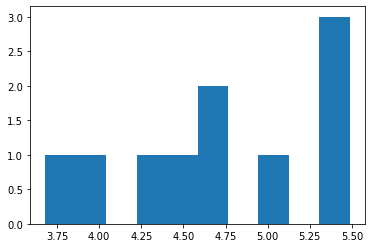

In [9]:
plt.hist(x_sum)

3. 1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [10]:
k, n = 0, 100
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 1:
        k = k + 1
print(k, n, k / n)

28 100 0.28


In [11]:
def func_C_n_k(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

In [12]:
k, n

(28, 100)

In [13]:
p = 1 / 4
q = 1 - p
p, q

(0.25, 0.75)

In [14]:
def binom(n, k, p, q):
    return func_C_n_k(n, k) * math.pow(p, k) * math.pow(q, n - k)

In [15]:
binom(n, k, p, q)

0.07008065602310466

3. 2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [16]:
n = 4
k = [0, 1, 2, 3, 4]
p = 0.2
q = 1 - p

In [17]:
for k_value in k:
    print('n =', n, 'k =', k_value, 'p =', p, 'q =', q)
    print('binom: ', binom(n, k_value, p, q))
    print()

n = 4 k = 0 p = 0.2 q = 0.8
binom:  0.4096000000000001

n = 4 k = 1 p = 0.2 q = 0.8
binom:  0.40960000000000013

n = 4 k = 2 p = 0.2 q = 0.8
binom:  0.15360000000000007

n = 4 k = 3 p = 0.2 q = 0.8
binom:  0.025600000000000008

n = 4 k = 4 p = 0.2 q = 0.8
binom:  0.0016000000000000003



4. (не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [18]:
count = 0
for p in itertools.permutations('0123456', 6):
    count += 1
count

5040

In [19]:
count = 0
for p in itertools.permutations([1, 2, 3, 5, 6], 2):
    count += 1
count

20

In [20]:
count = 0
for p in itertools.permutations('helloworld', 3):
    count += 1
count

720

5. (не обязательно) Дополните код расчетом коэффициента корреляции x и y по формуле

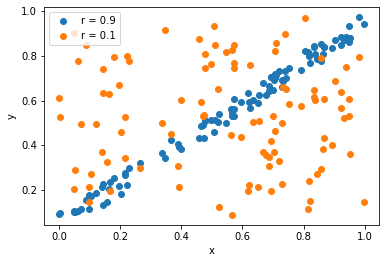

Коэффициент корреляции при r = 0.1, посчитанный при помощи библиотек: 0.9940105492531371
Коэффициент корреляции при r = 0.1, посчитанный при помощи формулы: 0.9940105492531369

Коэффициент корреляции при r = 0.9, посчитанный при помощи библиотек: 0.9940105492531371
Коэффициент корреляции при r = 0.9, посчитанный при помощи формулы: -0.026158222446061804


In [21]:
n = 100
r = [0.9, 0.1]
x = np.random.rand(n)
y_1 = r[0] * x + (1 - r[0]) * np.random.rand(n)
y_2 = r[1] * x + (1 - r[1]) * np.random.rand(n)
plt.plot(x, y_1, 'o', label='r = 0.9')
plt.plot(x, y_2, 'o', label='r = 0.1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print('Коэффициент корреляции при r = 0.1, посчитанный при помощи библиотек:', np.corrcoef(x, y_1)[0, 1])
c_for_formula_1 = np.sum((x - x.mean()) * (y_1 - y_1.mean())) / (math.sqrt((np.sum((x - x.mean()) ** 2)) * (np.sum((y_1 - y_1.mean()) ** 2))))
print('Коэффициент корреляции при r = 0.1, посчитанный при помощи формулы:', c_for_formula_1)
print()
print('Коэффициент корреляции при r = 0.9, посчитанный при помощи библиотек:', np.corrcoef(x, y_1)[0, 1])
c_for_formula_2 = np.sum((x - x.mean()) * (y_2 - y_2.mean())) / (math.sqrt((np.sum((x - x.mean()) ** 2)) * (np.sum((y_2 - y_2.mean()) ** 2))))
print('Коэффициент корреляции при r = 0.9, посчитанный при помощи формулы:', c_for_formula_2)